In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps

from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

0

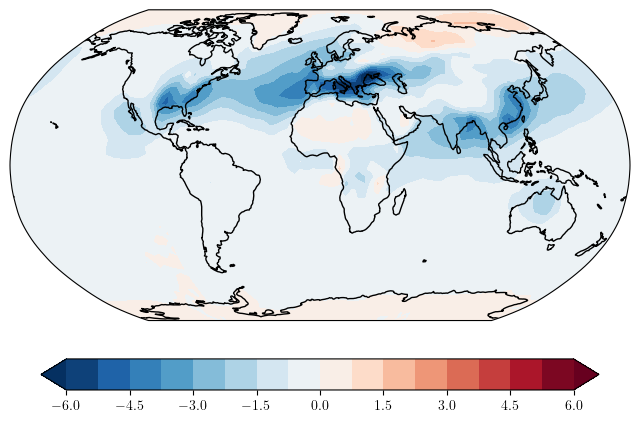

In [39]:
def plot():
    data = xr.open_dataset(f'../datasets/historical_simple-plumes_yearmean.nc').squeeze()

    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle))

    aod = data.aod_sp.isel(time=2005-1850)
    aod = xr.where(aod > 0.001, aod, np.nan)
    forcing = data.dR_sp_srad0.isel(time=1975-1850)
    #forcing = xr.where((forcing > 0.001) | (forcing < 0.001), forcing, np.nan)

    #var = data.dR_sp_srad0.isel(time=2005-1850)/aod
    var = forcing# / aod
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    #cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='RdBu_r',
        levels= np.linspace(-6., 6, 17),
        extend='both',
    )
    axins = inset_axes(ax, width='90%', height='10%', loc='lower center', borderpad= -5)
    cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)#, ticks=np.arange(Nmin, Nmax + 1, 2.5), label=label)
    ax.coastlines()

    return 0
plot()